In [ ]:
# 🎯 목적: 데이터 기반 고객 세분화 및 전략적 마케팅 의사결정
# RFM 점수화는 고객의 행동 데이터를 정량화하여, 고객을 다음과 같은 기준에 따라 그룹화할 수 있도록 합니다:

# 요소	측정 항목	점수화 목적
# Recency	고객이 최근 언제 구매했는가	고객의 활동성 또는 이탈 위험도 측정
# Frequency	얼마나 자주 구매했는가	고객의 충성도 또는 재방문율 측정
# Monetary	얼마나 많은 금액을 썼는가	고객의 경제적 가치 측정
# ✅ 가설과의 부합성 정리
# 아래는 앞서 설정한 가설들과, 지금 실행한 RFM 점수화 작업이 어떻게 연결되는지를 정리한 표입니다:

# 가설	관련 RFM 항목	점수화의 의미
# 최근에 구매한 고객일수록 이탈 가능성이 낮다	Recency	최근 구매일이 가까운 고객에게 높은 점수를 부여함으로써, 활성 고객 식별
# 구매 횟수가 많은 고객은 충성도가 높다	Frequency	구매 빈도가 높을수록 높은 점수를 부여하여, 브랜드 충성 고객을 분리
# 구매 금액이 큰 고객은 우수 고객이다	Monetary	금액 합산 기준으로 점수화하여, 매출 기여도가 높은 고객 식별
# 고객군 별로 다른 마케팅 전략이 필요하다	RFM Score 조합	RFM 점수 조합을 통해 VIP, 잠재고객, 이탈고객 등의 전략적 타겟 분류 가능
# 💡 요약
# RFM 점수화는 단순히 분석을 위한 계산이 아니라, 고객을 수익성·충성도·이탈 위험도 기준으로 분류하여 구체적인 마케팅 전략을 수립하기 위한 기반 작업입니다.
# 이를 통해 우리는 다음 단계로 이어지는 타겟팅 캠페인, 리텐션 전략, 고객 맞춤형 혜택 제안 등을 설계할 수 있습니다.

# 필요하시면, 각 RFM 조합 별 세부 고객 분류 및 캠페인 전략 매핑도 도와드릴 수 있습니다.

In [7]:
import pandas as pd
from datetime import datetime

# 데이터 불러오기 - 다른 인코딩 시도
try:
    df = pd.read_csv('merged_orders.csv', encoding='utf-8-sig')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('merged_orders.csv', encoding='euc-kr')  # 한국어 인코딩
    except UnicodeDecodeError:
        df = pd.read_csv('merged_orders.csv', encoding='cp949')  # 다른 한국어 인코딩

# 날짜 타입 변환
df['주문일시'] = pd.to_datetime(df['주문일시'])

# 기준일 설정 (예: 데이터 기준 마지막 날짜)
now = df['주문일시'].max()

# RFM 계산 기준: 주문자명 기준
rfm = df.groupby('주문자명').agg({
    '주문일시': lambda x: (now - x.max()).days,  # Recency
    '주문번호': 'count',                         # Frequency
    '상품구매금액': 'sum'                        # Monetary
}).reset_index()

rfm.columns = ['고객명', 'Recency', 'Frequency', 'Monetary']
df.head()

<ipython-input-7-a30204d01133>:11: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('merged_orders.csv', encoding='cp949')  # 다른 한국어 인코딩


,주문일시,주문자ID,주문 시 회원등급,총 주문금액,총 결제금액,총 실결제금액(최초정보) (KRW),상품구매금액,실제 환불금액,총 실제 환불금액,환불접수일,...,사용한 쿠폰명,상품 쿠폰 할인금액,주문서 쿠폰 할인금액,결제수단,결제업체,총 배송비(KRW)?(전체 품목에 표시),수령인 전화번호,주문자 전화번호,주문경로,주문경로(PC/모바일)
0,2023-05-01 00:06:38,NaN,NaN,41000.0,36413,36413,38000,0,0,NaN,...,NaN,NaN,NaN,신용카드,NaN,3000,010-****-3391,010-****-3391,네이버 페이,모바일
1,2023-05-01 00:07:32,NaN,NaN,79000.0,79000,79000,76000,0,0,NaN,...,NaN,NaN,NaN,신용카드,NaN,3000,010-****-4209,010-****-4209,네이버 페이,모바일
2,2023-05-01 00:31:02,NaN,NaN,41000.0,41000,41000,38000,0,0,NaN,...,NaN,NaN,NaN,선불금,NaN,3000,010-****-3197,010-****-3197,톡체크아웃,PC
3,2023-05-01 00:34:36,NaN,NaN,41000.0,41000,41000,38000,0,0,NaN,...,NaN,NaN,NaN,신용카드,NaN,3000,050-****-9305,010-****-9196,네이버 페이,모바일
4,2023-05-01 00:46:04,NaN,NaN,79000.0,79000,79000,38000,0,0,NaN,...,NaN,NaN,NaN,신용카드,NaN,3000,010-****-2241,010-****-2241,네이버 페이,모바일


In [17]:
# RFM 점수 컬럼을 원래 rfm 데이터프레임에 추가
rfm['R_Score'] = pd.qcut(rfm['주문일시'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['주문번호'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['상품구매금액'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# 최종 확인
rfm.head()


,주문자명,주문일시,주문번호,상품구매금액,R_Score,F_Score,M_Score,RFM_Score
0,#***우,584,4,217000,1,4,4,144
1,(****),132,2,88000,4,2,3,423
2,(********o,102,1,45000,4,1,2,412
3,(****아,170,1,39000,4,1,2,412
4,(****이,673,1,38000,1,1,1,111


In [20]:
import pandas as pd

# 여러 인코딩을 시도
encoding_list = ['utf-8-sig', 'euc-kr', 'cp949']

for enc in encoding_list:
    try:
        df_reviews = pd.read_csv('merged_reviews.csv', encoding=enc)
        print(f"✅ 성공적으로 읽은 인코딩: {enc}")
        break
    except UnicodeDecodeError:
        print(f"❌ 인코딩 실패: {enc}")


❌ 인코딩 실패: utf-8-sig
❌ 인코딩 실패: euc-kr
✅ 성공적으로 읽은 인코딩: cp949


In [28]:
# 리뷰 수 계산
review_counts = df_reviews.groupby('작성자명')['리뷰번호'].count().reset_index()
review_counts.columns = ['고객명', '리뷰횟수']

# RFM 데이터와 병합
# 컬럼명 변경
rfm.rename(columns={'주문자명': '고객명'}, inplace=True)

# 병합
rfm = pd.merge(rfm, review_counts, how='left', on='고객명')

# 리뷰횟수 결측치 처리
rfm['리뷰횟수'] = rfm['리뷰횟수'].fillna(0)

# 결과 확인
rfm.head()

# 확인
rfm.head()



,고객명,주문일시,주문번호,상품구매금액,R_Score,F_Score,M_Score,RFM_Score,리뷰횟수_x,리뷰횟수_y,리뷰횟수
0,#***우,584,4,217000,1,4,4,144,0.0,NaN,0.0
1,(****),132,2,88000,4,2,3,423,0.0,NaN,0.0
2,(********o,102,1,45000,4,1,2,412,0.0,NaN,0.0
3,(****아,170,1,39000,4,1,2,412,0.0,NaN,0.0
4,(****이,673,1,38000,1,1,1,111,1.0,1.0,1.0


In [34]:
# rfm에 이미 '리뷰횟수'가 있다면 삭제
if '리뷰횟수' in rfm.columns:
    rfm.drop(columns='리뷰횟수', inplace=True)

# 병합
rfm = pd.merge(rfm, review_counts, how='left', on='고객명')
rfm['리뷰횟수'] = rfm['리뷰횟수'].fillna(0)

# 병합 이후 필요한 컬럼으로 통일
rfm['리뷰횟수'] = rfm['리뷰횟수_y'].fillna(0)

# 불필요한 중복 컬럼 제거
rfm.drop(columns=['리뷰횟수_x', '리뷰횟수_y'], inplace=True)


KeyError: '리뷰횟수_y'

In [35]:
print("✅ rfm 컬럼명:", rfm.columns.tolist())
print("✅ review_counts 컬럼명:", review_counts.columns.tolist())
print(rfm.columns.tolist())


✅ rfm 컬럼명: ['고객명', '주문일시', '주문번호', '상품구매금액', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score', '리뷰횟수']
✅ review_counts 컬럼명: ['고객명', '리뷰횟수']
['고객명', '주문일시', '주문번호', '상품구매금액', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score', '리뷰횟수']


In [36]:
rfm.head()

,고객명,주문일시,주문번호,상품구매금액,R_Score,F_Score,M_Score,RFM_Score,리뷰횟수
0,#***우,584,4,217000,1,4,4,144,0.0
1,(****),132,2,88000,4,2,3,423,0.0
2,(********o,102,1,45000,4,1,2,412,0.0
3,(****아,170,1,39000,4,1,2,412,0.0
4,(****이,673,1,38000,1,1,1,111,1.0


In [38]:
rfm.rename(columns={
    '주문일시': '마지막구매후_일수',
    '주문번호': '총구매횟수',
    '상품구매금액': '총구매금액'
}, inplace=True)
rfm.head()

,고객명,마지막구매후_일수,총구매횟수,총구매금액,R_Score,F_Score,M_Score,RFM_Score,리뷰횟수
0,#***우,584,4,217000,1,4,4,144,0.0
1,(****),132,2,88000,4,2,3,423,0.0
2,(********o,102,1,45000,4,1,2,412,0.0
3,(****아,170,1,39000,4,1,2,412,0.0
4,(****이,673,1,38000,1,1,1,111,1.0


In [40]:
def segment_customer(row):
    r, f, m = int(row['R_Score']), int(row['F_Score']), int(row['M_Score'])
    if r >= 4 and f >= 4 and m >= 4:
        return 'VIP 고객'
    elif r <= 2 and f >= 3:
        return '잠재 이탈 고객'
    elif r >= 4 and f <= 2:
        return '신규 고객'
    elif r == 1 and f == 1 and m == 1:
        return '이탈 고객'
    else:
        return '일반 고객'

# 적용
rfm['고객세그먼트'] = rfm.apply(segment_customer, axis=1)
rfm['고객세그먼트']

,고객세그먼트
0,잠재 이탈 고객
1,신규 고객
2,신규 고객
3,신규 고객
4,이탈 고객
...,...
3958,잠재 이탈 고객
3959,일반 고객
3960,신규 고객
3961,일반 고객


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 51.8 MB/s eta 0:00:00


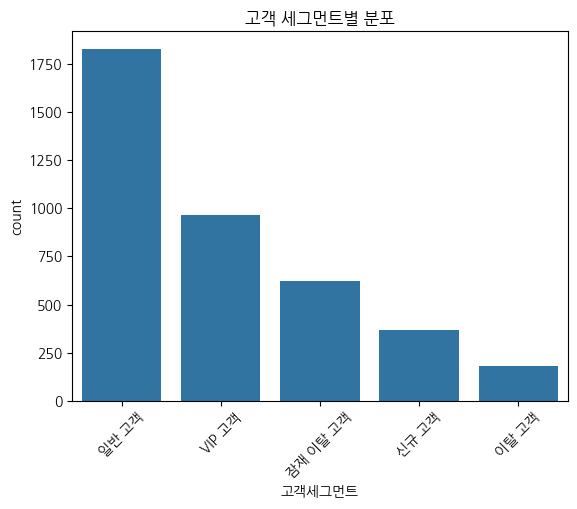

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
!pip install koreanize-matplotlib
import koreanize_matplotlib
# 세그먼트별 고객 수 시각화
sns.countplot(data=rfm, x='고객세그먼트', order=rfm['고객세그먼트'].value_counts().index)
plt.title('고객 세그먼트별 분포')
plt.xticks(rotation=45)
plt.show()


In [46]:
rfm.groupby('고객세그먼트')['총구매금액'].mean().sort_values(ascending=False)

,총구매금액
고객세그먼트,
VIP 고객,679869.158879
잠재 이탈 고객,122032.206119
일반 고객,89951.559934
신규 고객,52106.756757
이탈 고객,37895.604396


In [45]:
rfm.groupby('고객세그먼트')['리뷰횟수'].mean().sort_values(ascending=False)

,리뷰횟수
고객세그먼트,
VIP 고객,3.672897
잠재 이탈 고객,0.737520
일반 고객,0.523810
이탈 고객,0.302198
신규 고객,0.229730


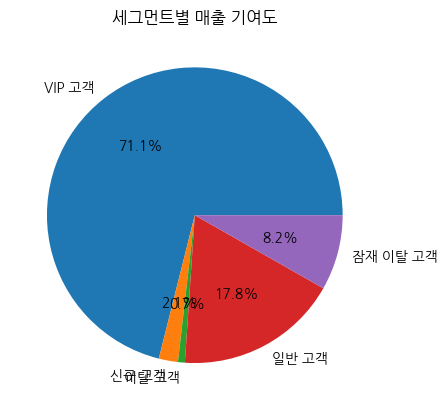

In [47]:
rfm.groupby('고객세그먼트')['총구매금액'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('세그먼트별 매출 기여도')
plt.ylabel('')
plt.show()

# 단계	결과
# RFM 수치 계산	고객의 구매 이력(최근성, 빈도, 금액)을 수치화
# 점수화	RFM 1~5점 점수 부여 (고객 상대 평가)
# 통합 점수	RFM_Score 생성 (예: 555, 144)
# 고객 분류	VIP, 이탈, 신규 등 그룹으로 세분화
# 행동 분석	세그먼트별 평균 금액, 리뷰 수 등 비교
# 시각화	세그먼트별 고객 수/행동 특성 시각화 완료

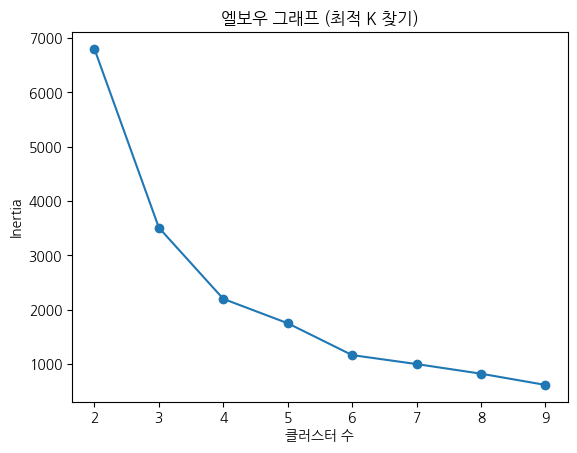

In [49]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 분석용 컬럼 선택 (수치형 원본 사용)
X = rfm[['마지막구매후_일수', '총구매횟수', '총구매금액']]

# 2. 표준화 (스케일 조정)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. 최적 클러스터 수 탐색 (엘보우 방법)
inertia = []
K_range = range(2, 10)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

# 4. 시각화
plt.plot(K_range, inertia, marker='o')
plt.xlabel('클러스터 수')
plt.ylabel('Inertia')
plt.title('엘보우 그래프 (최적 K 찾기)')
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


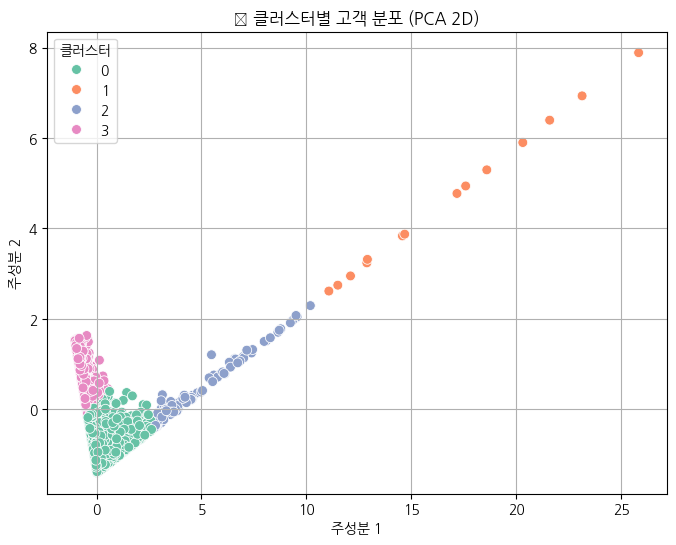

In [51]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. PCA로 2차원 축소
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# 2. 데이터프레임으로 변환
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_df['클러스터'] = rfm['클러스터']  # 클러스터 정보 추가

# 3. 시각화
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='클러스터', palette='Set2', s=50)
plt.title('📊 클러스터별 고객 분포 (PCA 2D)')
plt.xlabel('주성분 1')
plt.ylabel('주성분 2')
plt.legend(title='클러스터')
plt.grid(True)
plt.show()

# PC1 (주성분 1)	고객의 구매 규모·빈도 중심	Frequency, Monetary
# PC2 (주성분 2)	고객의 최근성(얼마나 최근에 구매했는가) 중심	Recency


In [50]:
from sklearn.cluster import KMeans

# K=4로 클러스터링
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['클러스터'] = kmeans.fit_predict(X_scaled)

# 각 클러스터의 평균값 확인
rfm.groupby('클러스터')[['마지막구매후_일수', '총구매횟수', '총구매금액']].mean().round(1)


,마지막구매후_일수,총구매횟수,총구매금액
클러스터,,,
0,115.2,5.3,229565.9
1,3.5,172.9,7881464.3
2,21.1,53.8,2306971.9
3,506.7,1.9,77138.4


In [53]:
# 클러스터 라벨 부여 (예시)
def label_cluster(row):
    if row['클러스터'] == 1:
        return 'VIP 고객'
    elif row['클러스터'] == 2:
        return '충성 고객'
    elif row['클러스터'] == 0:
        return '관심 고객'
    else:
        return '이탈 고객'

rfm['클러스터명'] = rfm.apply(label_cluster, axis=1)
rfm['클러스터명']

,클러스터명
0,이탈 고객
1,관심 고객
2,관심 고객
3,관심 고객
4,이탈 고객
...,...
3958,이탈 고객
3959,이탈 고객
3960,관심 고객
3961,이탈 고객


<ipython-input-54-7878278947a1>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=rfm, x='클러스터', y='총구매금액', ci=None, palette='Set2')
<ipython-input-54-7878278947a1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rfm, x='클러스터', y='총구매금액', ci=None, palette='Set2')
<ipython-input-54-7878278947a1>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=rfm, x='클러스터', y='리뷰횟수', ci=None, palette='Set2')
<ipython-input-54-7878278947a1>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rfm, x='클러스터', y='리뷰횟수', ci=None, palette='Set2')


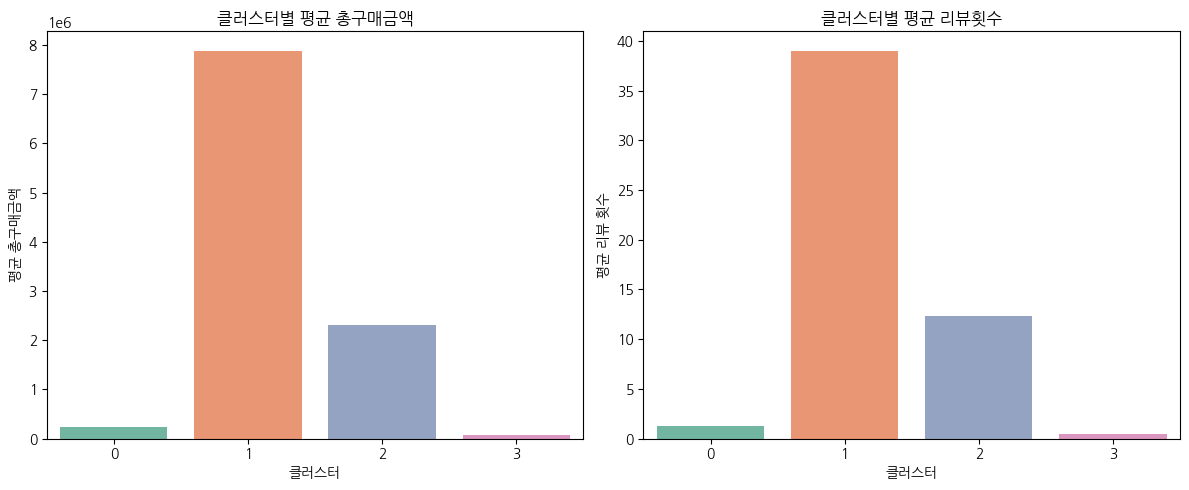

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

# 총구매금액
plt.subplot(1, 2, 1)
sns.barplot(data=rfm, x='클러스터', y='총구매금액', ci=None, palette='Set2')
plt.title('클러스터별 평균 총구매금액')
plt.xlabel('클러스터')
plt.ylabel('평균 총구매금액')

# 리뷰횟수
plt.subplot(1, 2, 2)
sns.barplot(data=rfm, x='클러스터', y='리뷰횟수', ci=None, palette='Set2')
plt.title('클러스터별 평균 리뷰횟수')
plt.xlabel('클러스터')
plt.ylabel('평균 리뷰 횟수')

plt.tight_layout()
plt.show()


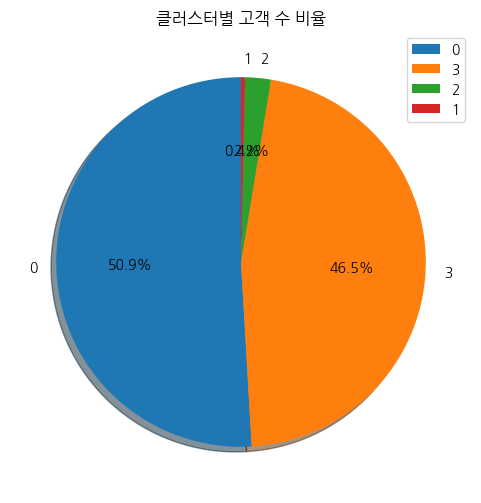

In [55]:
rfm['클러스터'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', figsize=(6,6),
    startangle=90, shadow=True, legend=True
)
plt.title('클러스터별 고객 수 비율')
plt.ylabel('')
plt.show()


<ipython-input-56-bf2816bb2543>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rfm, x='클러스터', y='총구매금액', palette='Set3')


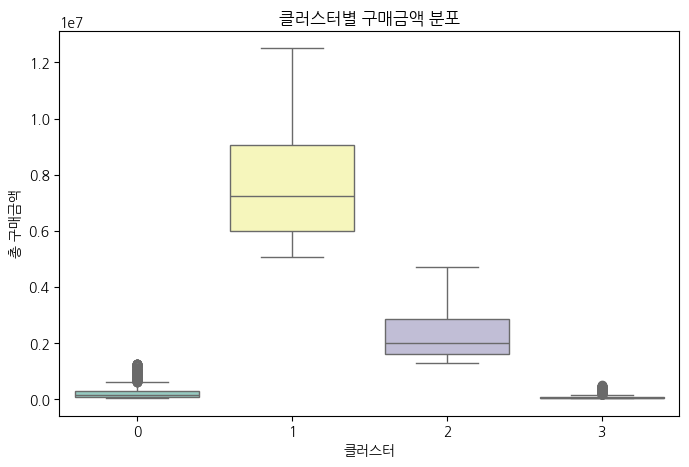

In [56]:
plt.figure(figsize=(8,5))
sns.boxplot(data=rfm, x='클러스터', y='총구매금액', palette='Set3')
plt.title('클러스터별 구매금액 분포')
plt.xlabel('클러스터')
plt.ylabel('총 구매금액')
plt.show()


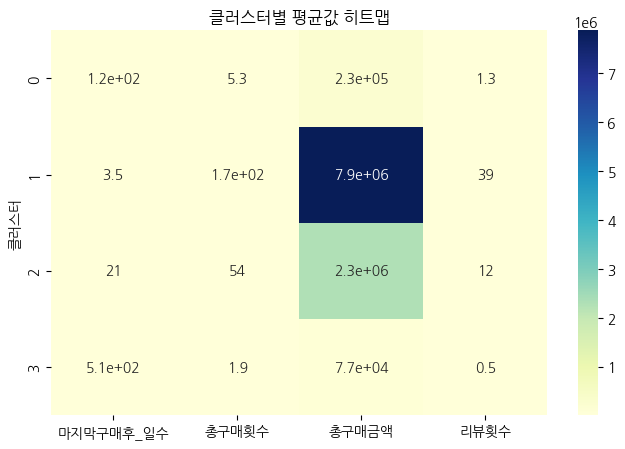

In [57]:
# 클러스터별 평균 정리
cluster_mean = rfm.groupby('클러스터')[['마지막구매후_일수', '총구매횟수', '총구매금액', '리뷰횟수']].mean().round(1)

# 히트맵 시각화
plt.figure(figsize=(8,5))
sns.heatmap(cluster_mean, annot=True, cmap='YlGnBu')
plt.title('클러스터별 평균값 히트맵')
plt.show()
